# Insurance Charges Prediction

#### Life cycle of Machine learning Project 
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

1) Problem statement
* This dataset contains detailed information about insurance customers, including their age, sex, body mass index (BMI), number of children, smoking status and region. Having access to such valuable insights allows to get a better view into customer behaviour and the factors that contribute to their insurance charges.

2) Data collection 
* Dataset Source - https://www.kaggle.com/datasets/thedevastator/prediction-of-insurance-charges-using-age-gender 
* The data consists of 8 column and 1338 rows.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("notebook\data\insurance.csv")

In [ ]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
df.shape

(1338, 8)

#### Dataset information

* Age : The age of the customer. 
* Sex : Gender of customer.
* Children : The number of children the customer has. 
* Smoker : Whether or not the customer is a smoker. 
* Region : The region the customer lives in. 
* Charges : The insurance charges for the customer.

### Check Missing values

In [112]:
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing value in dataset

### Check Duplicates

In [113]:
if df.duplicated().any():
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


There are no duplicates values in the data set

### Check data types

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


### Checking the number of unique values of each column

In [115]:
df.nunique()

index       1338
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Check statistics of data set

#### Numerical Features

In [116]:
df.describe().T.style.background_gradient(cmap='turbo')

,count,mean,std,min,25%,50%,75%,max
index,1338.000000,668.500000,386.391641,0.000000,334.250000,668.500000,1002.750000,1337.000000
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1338.000000,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010


#### Categorical Features

In [117]:
df.select_dtypes(exclude=[np.number]).describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [118]:
for column in df.select_dtypes(exclude=[np.number]).columns:
    unique_values = df[column].unique()
    print(f"Unique values of {column}")
    print(unique_values)
    print()

Unique values of sex
['female' 'male']

Unique values of smoker
['yes' 'no']

Unique values of region
['southwest' 'southeast' 'northwest' 'northeast']



### Dropping index column

In [119]:
df = df.drop(['index'], axis=1)

In [120]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploring Data

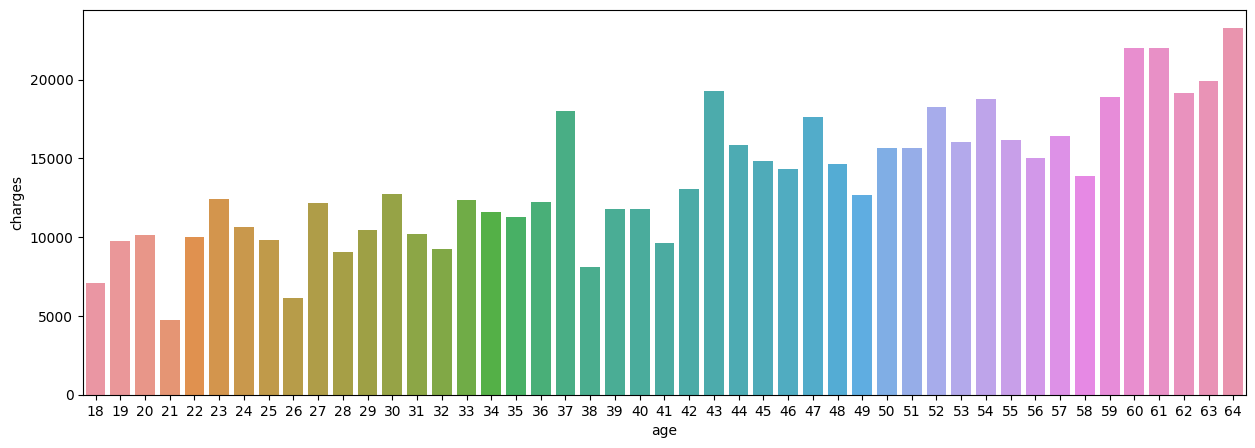

In [121]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='age', y='charges',errorbar=None)
plt.show()

Insights 
* The burden of the highest charges falls primarily on customers in the oldest age group.

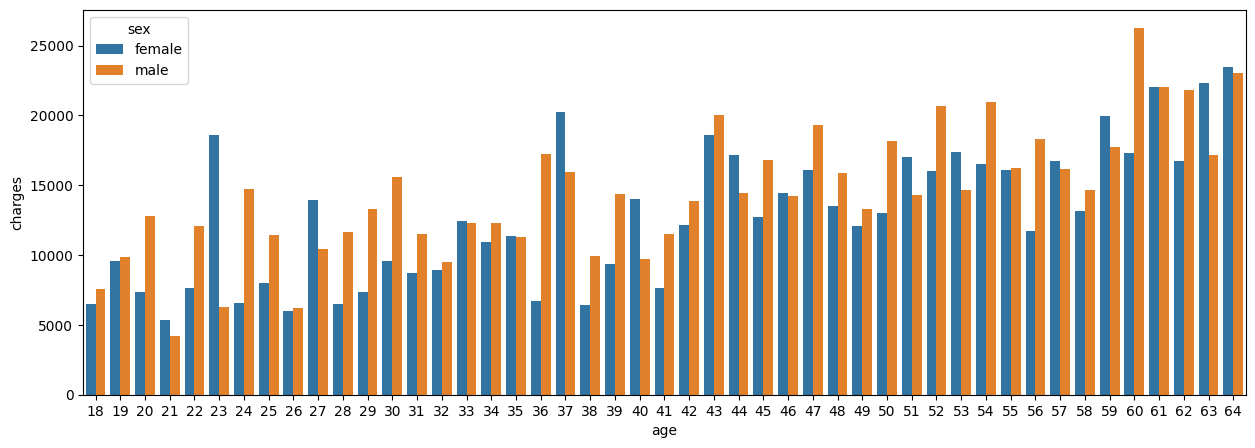

In [122]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='age', y='charges',hue='sex' ,errorbar=None)
plt.show()

Insgihts
* The plot shows that the charges for individuals of different genders are relatively similar across different age groups.
* Insurance charges are inversely related to age, with younger individuals typically paying less than older individuals.

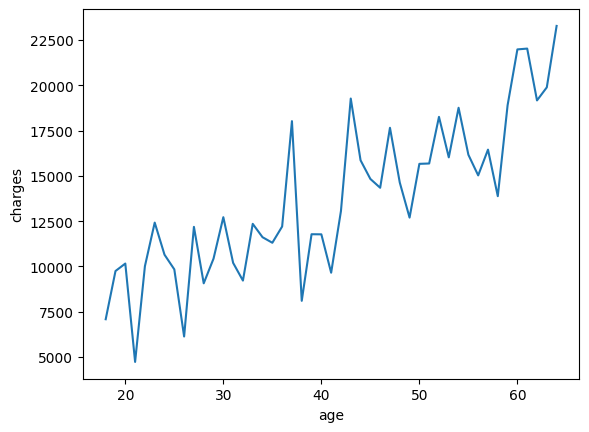

In [123]:
abc = df.groupby('age').agg({'bmi': 'mean', 'charges': 'mean'}).reset_index()

sns.lineplot(data=abc, x='age', y='charges')
plt.show()

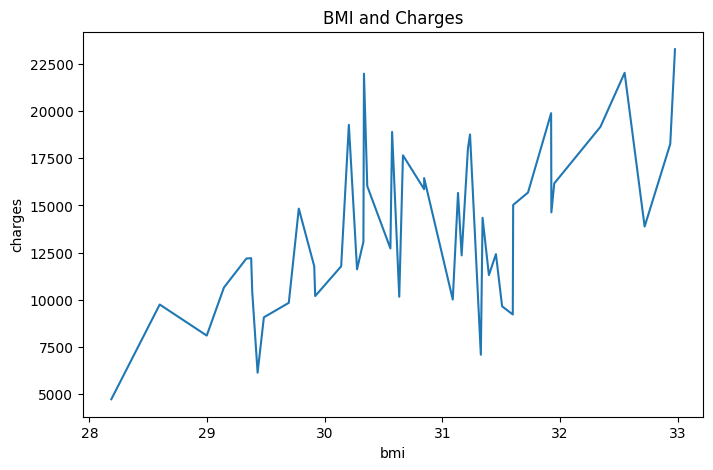

In [124]:
plt.figure(figsize=(8,5))
sns.lineplot(data=abc, x='bmi', y='charges')
plt.title('BMI and Charges')
plt.show()

Insights
* Individuals with higher BMIs as being at a higher risk of developing health problems, which could lead to higher healthcare costs.

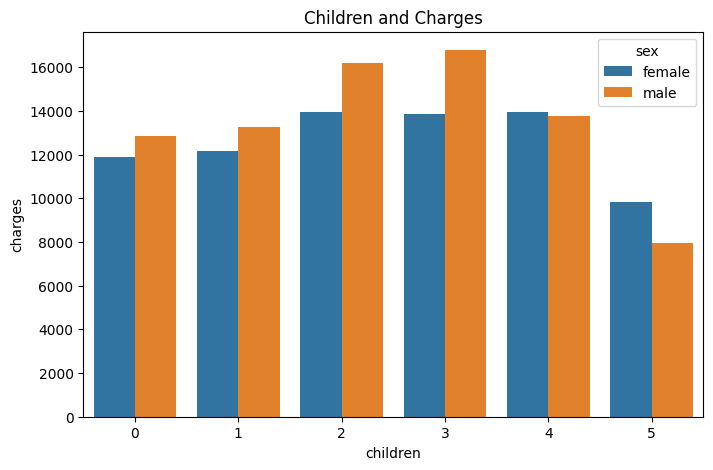

In [125]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='children',y='charges', hue='sex', errorbar=None)
plt.title('Children and Charges')
plt.show()

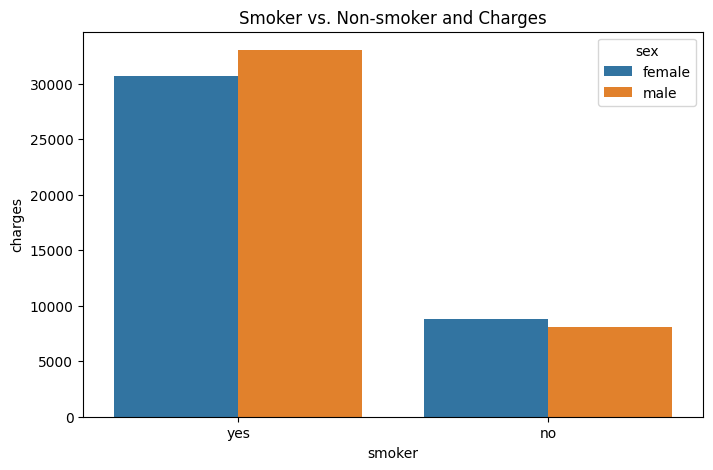

In [126]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='smoker',y='charges', hue='sex', errorbar=None)
plt.title('Smoker vs. Non-smoker and Charges')
plt.show()

Insights
* Smoking is a known risk factor for various health problems, leading to higher insurance costs for individuals who smokes.

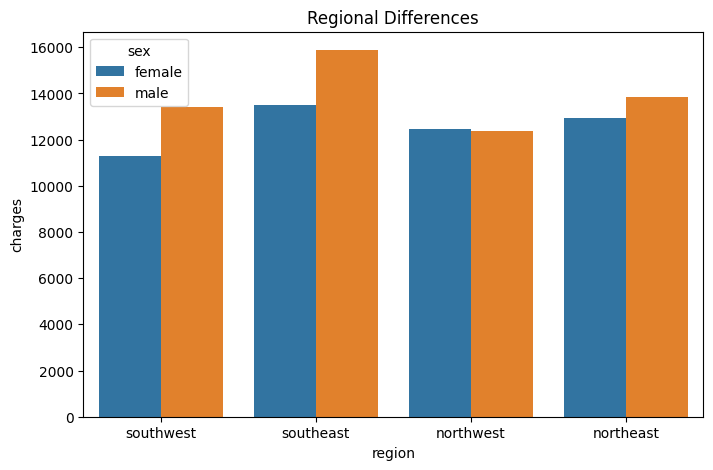

In [127]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='region',y='charges', hue='sex', errorbar=None)
plt.title("Regional Differences")
plt.show()

In [130]:
## Performin One Hot Encoding on Sex & Smoker Feature

df["sex"] = df["sex"].apply(lambda x : 1 if x=='male' else 0) 
df["smoker"] = df["smoker"].apply(lambda x : 1 if x=='yes' else 0) 

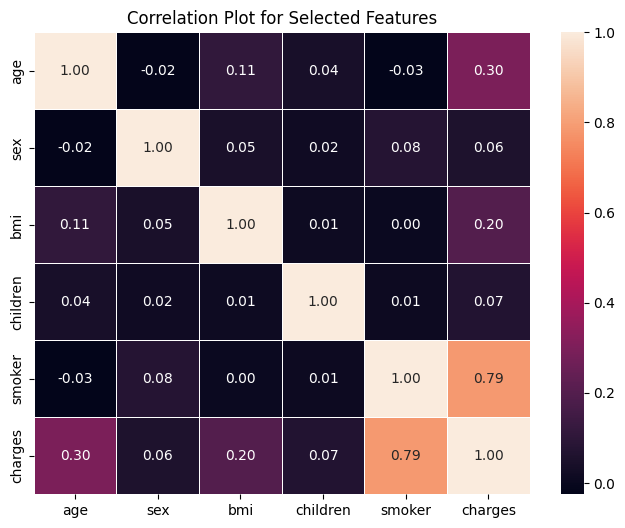

In [141]:
num_features = df.select_dtypes(exclude='object').columns
selected_df = df[num_features]
correlation_matrix = selected_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Plot for Selected Features')
plt.show()

Insights
* The correlation plot shows that smoking is strongly related to charges, while BMI and age have weaker relationships.